In [5]:
# create data for training / testing hmms

# create data
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.mixture import GaussianMixture

# source: https://github.com/is0383kk/GMM-Gibbs/blob/main/gmm_gibbs.ipynb

In [42]:
from hmmlearn import hmm

# define covar, means, start prob and transmat

covar = np.array( # This is observation1
    [[[5.0, 0],
    [0, 5.0]],

     [[5.0, 0.0],
     [0.0, 5.0]],

     [[5.0, 0.0],
     [0.0, 5.0]]]
)

means = np.array( # This is observation1
    [[0, 10.0],
     [-5.0, -5.0],
     [10.0, 0.0]]
)

start_prob = np.array([0.5, 0.2, 0.3])

A = np.array(np.array([[0.8, 0.1, 0.1, 0.04, 0.03, 0.04],
                       [0.08, 0.85, 0.07, 0.04, 0.02, 0.03],
                       [0.05, 0.05, 0.9, 0.02, 0.02, 0.02],
                       [0.04, 0.03, 0.09, 0.75, 0.04, 0.05],
                       [0.02, 0.04, 0.03, 0.02, 0.87, 0.02],
                       [0.01, 0.01, 0.01, 0.01, 0.01, 0.95]]))
A = A[0:3, 0:3]

# A = A / np.sum(A, axis=1)
np.sum(A, axis=1)

array([1., 1., 1.])

In [43]:
k = 3
my_hmm = hmm.GaussianHMM(n_components=k, covariance_type='full')
my_hmm.covars_, my_hmm.means_, my_hmm.startprob_, my_hmm.transmat_ = covar, means, start_prob, A
my_hmm.n_features = 2
data, ss = my_hmm.sample(200)

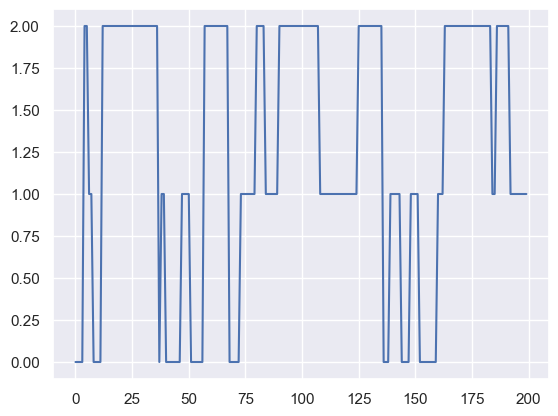

In [44]:
plt.plot(ss)

/var/folders/8g/9gktnhys29123gd2vy8kl6q40000gn/T/ipykernel_5552/3594536788.py:10: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ellipse = Ellipse(mu, w, h, theta, color=color, edgecolor='black')  # edgecolor for better visibility
/var/folders/8g/9gktnhys29123gd2vy8kl6q40000gn/T/ipykernel_5552/3594536788.py:10: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ellipse = Ellipse(mu, w, h, theta, color=color, edgecolor='black')  # edgecolor for better visibility


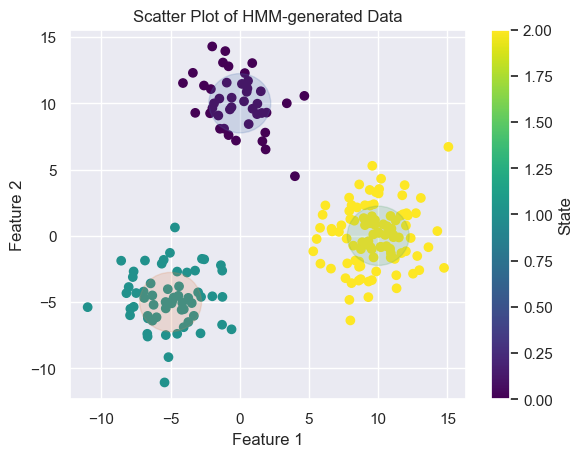

In [45]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np

def plot_ellipse(ax, mu, sigma, color="b"):
    vals, vecs = np.linalg.eigh(sigma)
    x, y = vecs[:, 0]
    theta = np.degrees(np.arctan2(y, x))
    w, h = 2 * np.sqrt(vals)
    ellipse = Ellipse(mu, w, h, theta, color=color, edgecolor='black')  # edgecolor for better visibility
    ellipse.set_clip_box(ax.bbox)
    ellipse.set_alpha(0.2)
    ellipse = ax.add_artist(ellipse)
    return ellipse

# Scatter plot
plt.scatter(data[:, 0], data[:, 1], c=ss, cmap='viridis', marker='o')

for state in range(k):
    state_data = data[ss == state]
    state_mean = my_hmm.means_[state]
    state_cov = my_hmm.covars_[state]
    plot_ellipse(plt.gca(), state_mean, state_cov, color=f'C{state}')

# Add labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of HMM-generated Data')

# Show colorbar for states
cbar = plt.colorbar()
cbar.set_label('State')

# Show the plot
plt.show()

In [46]:
import pickle

# Save state sequence and data to a pickle file
with open('hmm_data.pkl', 'wb') as file:
    pickle.dump({'state_sequence': ss, 'data': data}, file)

In [47]:
import pickle

# Load state sequence and data from the pickle file
with open('hmm_data.pkl', 'rb') as file:
    loaded_data = pickle.load(file)

# Access the loaded data
loaded_ss = loaded_data['state_sequence']
loaded_data = loaded_data['data']